# Polynomial Regression - Age vs Height Data

**Nikitia Ramruthan**

Notes on Dataset:
- The dataset used in this study is not reliable, it is a mock dataset, this project is only for the purpose of demonstrating a Polynomial Regression Model.
- A more accurate representation of what the 'Age' vs 'Height' relationship would look like, can be found here:
https://ourworldindata.org/human-height


### Problem

In this analysis I compare a Simple Linear Regression model to a Polynomial Regression model. A simple linear regression model is used to model the relationship between `two continuous variables`. However, when the data does not have a linear relationship, we will not be able to determine the line of best fit or use the model to predict values with accuracy. 

Consider the example from (https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/) which indicates why we use Polynomial Regression:

The input value is 35 and the degree of a polynomial is 2 so I will find 35 power 0, 35 power 1, and 35 power 2, this helps to interpret the non-linear relationship in data.

The polynomial equation: `y = a0 + a1x1 + a2x12 + … + anx1n`

The degree of a term is the sum of the exponents of the variables that appear in it, and thus is a non-negative integer. The degrees of freedom is a Hyperparameter and should be chosen wisely. A high degree of a polynomial tries to overfit the data and a low degree of a polynomial tries to underfit it. Hence, we need to find the optimum value of a degree.

### Importing Libraries and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import opendatasets as od

In [2]:
od.download("https://www.kaggle.com/datasets/sakshamjn/heightvsweight-for-linear-polynomial-regression")

Skipping, found downloaded files in ".\heightvsweight-for-linear-polynomial-regression" (use force=True to force download)


In [3]:
df = pd.read_csv("heightvsweight-for-linear-polynomial-regression/HeightVsWeight.csv")
df.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


### Data Processing

In [4]:
# extent of data
df.shape

(71, 2)

In [5]:
# summary statistics
df.describe()

,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


In [6]:
# null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


* no null values
* continuous, numerical data

In [7]:
# duplicates
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Age, Height]
Index: []


* no duplicated rows

### Data 80/20 Split

In [8]:
# store data as input(dep) and output(indep) variables
x = df['Age'].values
y = df['Height'].values

In [9]:
# because the data has a single feature
x = x.reshape(-1, 1)

In [10]:
# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(df[['Age']], df['Height'], test_size=0.2, random_state=0)

### Linear Regression Model

In [11]:
# fit the simple linear regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

#### Scatter Plot

Text(0, 0.5, 'Height')

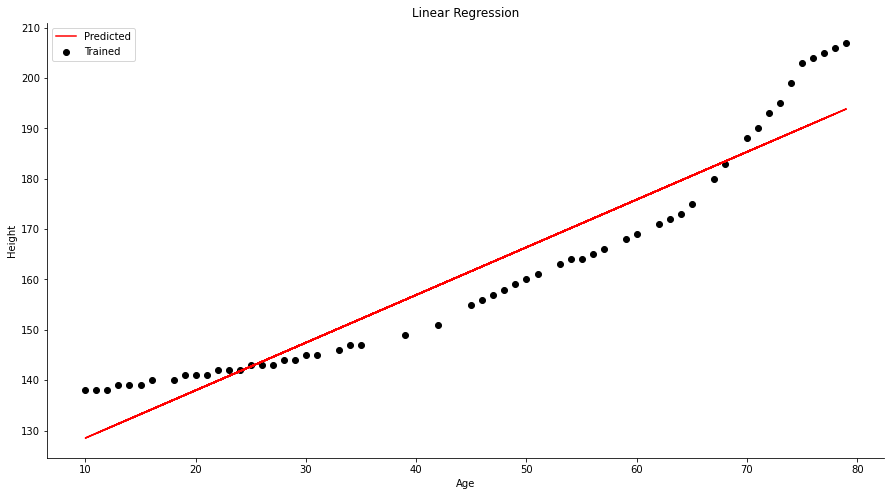

In [12]:
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.figure(figsize=(15,8))
plt.scatter(x_train, y_train, label='Trained', color='black')
plt.plot(x_train, lr_model.predict(x_train), label='Predicted', color='red')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Height')

### Polynomial Regression Model

In [13]:
# adding a polynomial term to linear regresion
# set variable to apply pre-processing function
pf = PolynomialFeatures(degree=2)

# transforms x into a new matrix x_poly
# x_poly contains additional indep. variables ie. x^2, x^3, etc.
x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.transform(x_test)

In [14]:
# fit the polynomial regression model
pr_model = LinearRegression()
pr_model.fit(x_train_poly, y_train)
y_pred = pr_model.predict(x_test_poly)

#### Scatter Plot

Text(0, 0.5, 'Height')

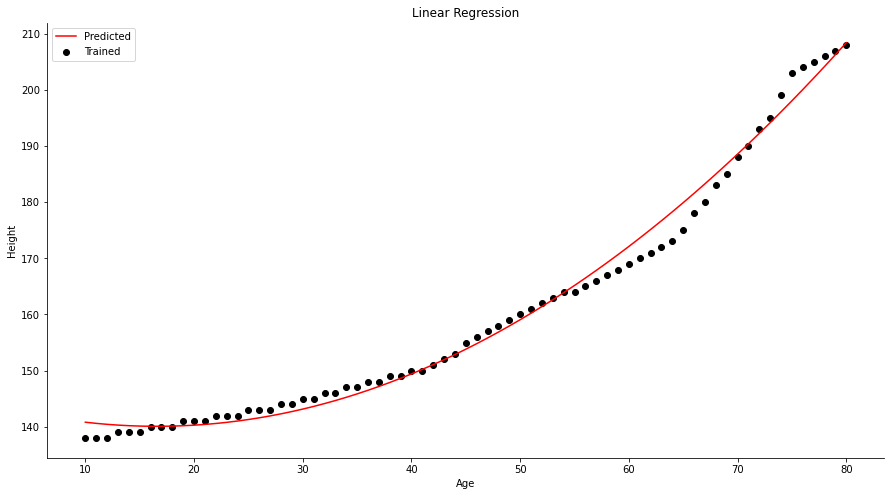

In [15]:
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.figure(figsize=(15,8))
plt.scatter(df['Age'],df['Height'], label='Trained', color = 'black')
plt.plot(df['Age'],pr_model.predict(pf.transform(df[['Age']])), label='Predicted', color = 'red')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Height')

### Model Prediction Accuracy
#### Simple Linear Regression

In [16]:
# predicted height from test dataset w.r.t simple Linear Regression
y_pred_lr = lr_model.predict(x_test)

# model evaluation using R^2 for lr
r2_lr = metrics.r2_score(y_test, y_pred_lr)
print('Linear Regression Model (R^2):', r2_lr)

Linear Regression Model (R^2): 0.8547153936823451


#### Polynomial Regression

In [17]:
# predicted height from test dataset w.r.t Polynomial Regression
y_pred_pr = pr_model.predict(pf.fit_transform(x_test))

# model evaluation using R^2 for pr
r2_pr = metrics.r2_score(y_test, y_pred_pr)
print('Polynomial Regression Model (R^2):', r2_pr)

Polynomial Regression Model (R^2): 0.9909864052059418


### Conclusion
The R-squared value of the Polynomial Regression Model exceeds that of the Linear Regression Model. This means that the Polynomial Model has a more accurate best-fit line. 

i.e. Most of the variation of actual values from the mean value are explained by the Polynomial Regression model. 

#### Using the Model to Predict Values

In [18]:
# predict height y given x=25
lr_model.predict([[25]])

array([142.72398939])

In [19]:
# predict height y given x=25
pr_model.predict(pf.fit_transform([[25]]))

array([141.29758036])

#### Showing the accuracy of a predicted data point

In [20]:
# model performance
theta0 =pr_model.intercept_
_, theta1, theta2 = pr_model.coef_

print('Intercept:', theta0)
print('Coefficients:', theta1, theta2)

Intercept: 144.74013919288308
Coefficients: -0.562024539127894 0.016972887436578904


In [21]:
# predict height y using pr model transformed with polynomial features
y_new = pr_model.predict(pf.fit_transform([[25]]))
y_new

array([141.29758036])

#### Scatter Plot

Text(0, 0.5, 'Height')

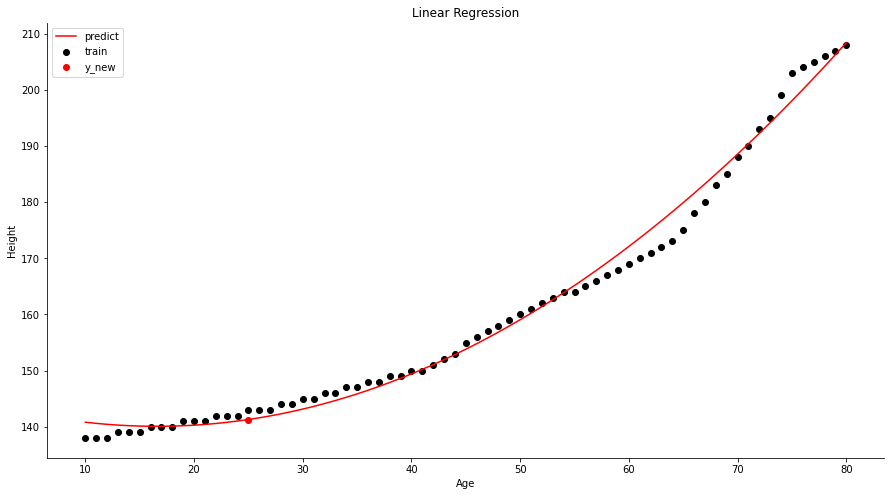

In [22]:
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.figure(figsize=(15,8))
plt.scatter(df['Age'],df['Height'], label='train', color = 'black')
plt.scatter(25, y_new, label='y_new', color = 'red')
plt.plot(df['Age'],pr_model.predict(pf.transform(df[['Age']])), label='predict', color = 'red')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Height')

The graph shows that the training data points are well fitted to the model predictions and the model is accurate. 